In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
plt.rcParams['figure.figsize'] = (5, 4)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [ ]:
def zero_pad(X, pad): #defining a zero padding function to apply it to our filter
  X_pad = np.pad(X, ((0,0), (pad, pad), (pad, pad), (0,0)), 'constant')
  return X_pad

x.shape = (4, 3, 3, 2)
x_pad.shape = (4, 7, 7, 2)
x[1,1] = [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


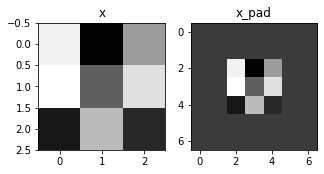

In [ ]:
#Checking our above created function on a randomly generated data set.
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)
print ("x.shape =", x.shape)
print ("x_pad.shape =", x_pad.shape)
print ("x[1,1] =", x[1,1])
print ("x_pad[1,1] =", x_pad[1,1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])

In [ ]:
def conv_single_step(a_slice_prev, W ,b): # Defining a single step covolution function.
  s=np.multiply(a_slice_prev, W)
  Z=np.sum(s)
  Z= Z + float(b)
  return Z


In [ ]:
np.random.seed(1)
a_slice_prev=np.random.randn(4,4,3)
W=np.random.randn(4,4,3)
b=np.random.randn(1,1,1)

Z=conv_single_step(a_slice_prev,W,b)
print(Z)

-6.999089450680221


In [ ]:
def conv_forward(A_prev, W, b, hypara): # Defining convolution function for forward propogation.
  (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape[0],A_prev.shape[1],A_prev.shape[2],A_prev.shape[3]
  
  (f, n_C_prev, n_C) = W.shape[0],W.shape[2],W.shape[3]

  stride = hypara['stride']
  pad = hypara['pad']

  #o/p dimensions

  n_H = int(((n_H_prev - f + (2 * pad))/stride) + 1)

  n_W = int(((n_W_prev - f + (2 * pad))/stride) + 1)
  
  #inintializing o/p variable

  Z = np.zeros((m, n_H, n_W, n_C))

  A_prev_pad = zero_pad(A_prev, pad)
#The code below is useful for slicing the portion on which convolution is going on
  for i in range(m):
    a_prev_pad = A_prev_pad[i]

    for h in range(n_H):
      for w in range(n_W):
        for c in range(n_C):

          vert_start = h * stride #since we slice the portions according to the stride
          vert_end = vert_start + f
          horiz_start = w * stride
          horiz_end = horiz_start + f

          a_slice_prev = a_prev_pad[vert_start:vert_end,horiz_start:horiz_end,:]
          
          Z[i, h, w, c] = conv_single_step(a_slice_prev,W[:,:,:,c],b[:,:,:,c])
          #print("Z[3,2,1]", Z[3,2,1])


  assert(Z.shape == (m, n_H, n_W, n_C))
  
  cache = (A_prev, W, b, hypara)
  #print("Z[3,2,1]", Z[3,2,1])

  return Z, cache

In [ ]:
np.random.seed(1)
A_prev = np.random.randn(10,4,4,3)
W = np.random.randn(2,2,3,8)
b = np.random.randn(1,1,1,8)
hypara = {'pad' : 2,
           'stride' : 2}

Z, cache_conv = conv_forward(A_prev, W, b, hypara)
#print("Z:", Z)
print("Z's mean =", np.mean(Z))
print("Z[3,2,1] =", Z[3,2,1])
print("cache_conv[0][1][2][3] =", cache_conv[0][1][2][3])

Z's mean = 0.048995203528855794
Z[3,2,1] = [-0.61490741 -6.7439236  -2.55153897  1.75698377  3.56208902  0.53036437
  5.18531798  8.75898442]
cache_conv[0][1][2][3] = [-0.20075807  0.18656139  0.41005165]


In [ ]:
def pool_forward(A_prev, hypara, mode='max'):
  (m,n_H_prev,n_W_prev,n_C_prev) = A_prev.shape

  f = hypara['f']
  stride = hypara['stride']

  n_H = int(((n_H_prev - f) / stride) + 1)

  n_W = int(((n_W_prev - f) / stride) + 1)

  n_C = n_C_prev

  A = np.zeros((m,n_H,n_W,n_C))

  for i in range(m):
    for h in range(n_H):
      for w in range(n_W):
        for c in range(n_C):

          vert_start = h * stride
          vert_end = vert_start + f
          horiz_start = w * stride
          horiz_end = horiz_start + f


          a_prev_slice = A_prev[i,vert_start:vert_end,horiz_start:horiz_end,c]

          if mode == 'max':
            A[i,h,w,c] = np.max(a_prev_slice)
          elif mode == 'average':
            A[i,h,w,c] = np.mean(a_prev_slice)

  cache = (A_prev, hypara)

  assert(A.shape == (m, n_H, n_W, n_C))

  return A, cache


In [ ]:
np.random.seed(1)
A_prev = np.random.randn(2,4,4,3)
hypara = {'stride' : 2,
          'f' : 3}

A, cache = pool_forward(A_prev, hypara)

print("mode = max")
print("A =", A)
print()
A, cache = pool_forward(A_prev, hypara, mode = "average")
print("mode = average")
print("A =", A)

mode = max
A = [[[[1.74481176 0.86540763 1.13376944]]]


 [[[1.13162939 1.51981682 2.18557541]]]]

mode = average
A = [[[[ 0.02105773 -0.20328806 -0.40389855]]]


 [[[-0.22154621  0.51716526  0.48155844]]]]
